# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

This project aim to scrap the data from the website and make visualization to pandas

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [39]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [40]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [41]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. The data from https://www.exchange-rates.org/history/IDR/USD/T, we will see daily exchange rate movements dollar to Rupiah.

In [42]:
table = soup.find('table', attrs = {'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-12-14">
     December 14, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-12-14">
     2023-12-14
    </a>
   </td>
   <td>
    <span class="w">
     <span clas


Finding row length.

In [43]:
row = table.find_all('a', attrs = {'class':'w'})
row_length = len(row)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [44]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    Date = table.find_all('a', attrs = {'class':'w'})[i].text

    Harga = table.find_all('span', attrs = {'class':'w'})[i].text
    Harga = Harga.strip()

    temp.append((Date,Harga))
    
temp 

[('December 14, 2023', '$1 = Rp15,476'),
 ('December 13, 2023', '$1 = Rp15,360'),
 ('December 12, 2023', '$1 = Rp15,576'),
 ('December 11, 2023', '$1 = Rp15,653'),
 ('December 8, 2023', '$1 = Rp15,573'),
 ('December 7, 2023', '$1 = Rp15,507'),
 ('December 6, 2023', '$1 = Rp15,514'),
 ('December 5, 2023', '$1 = Rp15,463'),
 ('December 4, 2023', '$1 = Rp15,485'),
 ('December 1, 2023', '$1 = Rp15,413'),
 ('November 30, 2023', '$1 = Rp15,559'),
 ('November 29, 2023', '$1 = Rp15,459'),
 ('November 28, 2023', '$1 = Rp15,352'),
 ('November 27, 2023', '$1 = Rp15,505'),
 ('November 24, 2023', '$1 = Rp15,540'),
 ('November 23, 2023', '$1 = Rp15,633'),
 ('November 22, 2023', '$1 = Rp15,656'),
 ('November 21, 2023', '$1 = Rp15,517'),
 ('November 20, 2023', '$1 = Rp15,389'),
 ('November 17, 2023', '$1 = Rp15,424'),
 ('November 16, 2023', '$1 = Rp15,484'),
 ('November 15, 2023', '$1 = Rp15,519'),
 ('November 14, 2023', '$1 = Rp15,459'),
 ('November 13, 2023', '$1 = Rp15,683'),
 ('November 10, 2023',

## Creating data frame & Data wrangling

Put the array into dataframe

In [45]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Harga'))
df.head()

,Date,Harga
0,"December 14, 2023","$1 = Rp15,476"
1,"December 13, 2023","$1 = Rp15,360"
2,"December 12, 2023","$1 = Rp15,576"
3,"December 11, 2023","$1 = Rp15,653"
4,"December 8, 2023","$1 = Rp15,573"


first will check the strukture data

In [46]:
df.dtypes

Date     object
Harga    object
dtype: object

In [47]:
df['Harga']= df['Harga'].apply(lambda x: x.replace('$1 = Rp','')).str.replace(',','')
df


,Date,Harga
0,"December 14, 2023",15476
1,"December 13, 2023",15360
2,"December 12, 2023",15576
3,"December 11, 2023",15653
4,"December 8, 2023",15573
...,...,...
124,"June 23, 2023",15045
125,"June 22, 2023",14939
126,"June 21, 2023",14945
127,"June 20, 2023",15015


In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
df['Harga'] = df['Harga'].astype('float64')

In [50]:

df.dtypes

Date     datetime64[ns]
Harga           float64
dtype: object

In [51]:
df.set_index('Date',inplace=True)

In [52]:
df

,Harga
Date,
2023-12-14,15476.0
2023-12-13,15360.0
2023-12-12,15576.0
2023-12-11,15653.0
2023-12-08,15573.0
...,...
2023-06-23,15045.0
2023-06-22,14939.0
2023-06-21,14945.0


In [53]:
df1 = df.copy()

then we can make plot visualization daily exchange kurs 

<Axes: title={'center': 'Movement Daily Kurs Exchange'}, xlabel='Time', ylabel='Kurs Dolar'>

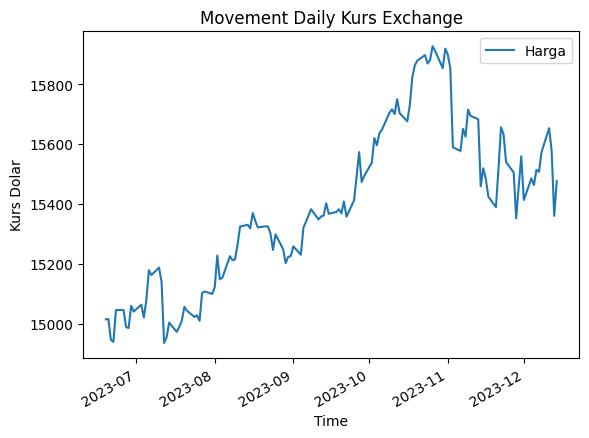

In [55]:
df.plot(
    title = "Movement Daily Kurs Exchange",
    xlabel = "Time",
    ylabel = "Kurs Dolar"
)

from chart above we can get :
- trend kurs dollar tends to rise
- The highest dollar exchange rate was in November

In [56]:
df["Harga"].mean().round(2)

15386.77

then we can see the plot monthly exchange rate, make the interactive plot

In [57]:
import plotly.express as px

In [59]:
px.line(df)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Harga<br>Date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Harga',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Harga',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 12, 14, 0, 0),
                          datetime.datetime(2023, 12, 13, 0, 0),
                          datetime.datetime(2023, 12, 12, 0, 0),
                          datetime.datetime(2023, 12, 11, 0, 0),
                          datetime.datetime(2023, 12, 8, 0, 0),
                          datetime.datetime(2023, 12, 7, 0, 0),
                          datetime.datetime(2023, 12, 6, 0, 0),
                          datetime.datetime(2023, 12, 5, 0, 0),
                          datetime.datetime(2023, 12, 4, 0, 0),
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2023, 11, 30, 0, 0),
                          datetime.datetime(2023, 11, 29, 0, 0),
                          datetime.datetime(2023, 11, 28, 0, 0),
                          datetime.datetime(2023, 11, 27, 0, 0),
                          datetime.datetime(2023, 11, 24, 0, 0),
                          datetime.datetime(2023, 11, 23, 0, 0),
                          datetime.datetime(2023, 11, 22, 0, 0),
                          datetime.datetime(2023, 11, 21, 0, 0),
                          datetime.datetime(2023, 11, 20, 0, 0),
                          datetime.datetime(2023, 11, 17, 0, 0),
                          datetime.datetime(2023, 11, 16, 0, 0),
                          datetime.datetime(2023, 11, 15, 0, 0),
                          datetime.datetime(2023, 11, 14, 0, 0),
                          datetime.datetime(2023, 11, 13, 0, 0),
                          datetime.datetime(2023, 11, 10, 0, 0),
                          datetime.datetime(2023, 11, 9, 0, 0),
                          datetime.datetime(2023, 11, 8, 0, 0),
                          datetime.datetime(2023, 11, 7, 0, 0),
                          datetime.datetime(2023, 11, 6, 0, 0),
                          datetime.datetime(2023, 11, 3, 0, 0),
                          datetime.datetime(2023, 11, 2, 0, 0),
                          datetime.datetime(2023, 11, 1, 0, 0),
                          datetime.datetime(2023, 10, 31, 0, 0),
                          datetime.datetime(2023, 10, 30, 0, 0),
                          datetime.datetime(2023, 10, 27, 0, 0),
                          datetime.datetime(2023, 10, 26, 0, 0),
                          datetime.datetime(2023, 10, 25, 0, 0),
                          datetime.datetime(2023, 10, 24, 0, 0),
                          datetime.datetime(2023, 10, 23, 0, 0),
                          datetime.datetime(2023, 10, 20, 0, 0),
                          datetime.datetime(2023, 10, 19, 0, 0),
                          datetime.datetime(2023, 10, 18, 0, 0),
                          datetime.datetime(2023, 10, 17, 0, 0),
                          datetime.datetime(2023, 10, 16, 0, 0),
                          datetime.datetime(2023, 10, 13, 0, 0),
                          datetime.datetime(2023, 10, 12, 0, 0),
                          datetime.datetime(2023, 10, 11, 0, 0),
                          datetime.datetime(2023, 10, 10, 0, 0),
                          datetime.datetime(2023, 10, 9, 0, 0),
                          datetime.datetime(2023, 10, 6, 0, 0),
                          datetime.datetime(2023, 10, 5, 0, 0),
                          datetime.datetime(2023, 10, 4, 0, 0),
                          datetime.datetime(2023, 10, 3, 0, 0),
                          datetime.datetime(2023, 10, 2, 0, 0),
                          datetime.datetime(2023, 9, 29, 0, 0),
                          datetime.da

then we can describes the form of data distribution with boxlot

In [64]:
df1 = df1.reset_index()

In [65]:
df1['Quarter']= df1['Date'].dt.to_period('Q')

Harga    Axes(0.125,0.11;0.775x0.77)
dtype: object

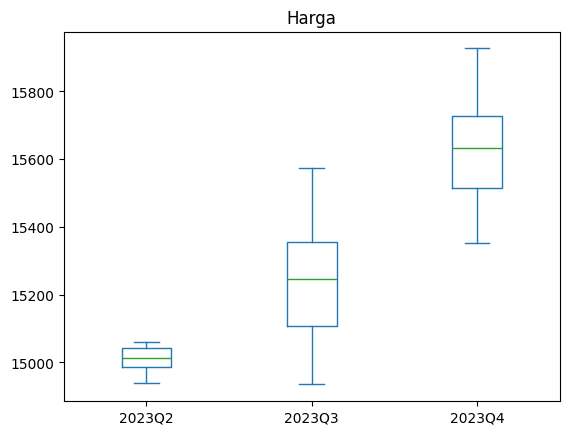

In [69]:
df1.plot(
    kind = "box",
    by = "Quarter"
)

from the boxplot we can see :
- the 4th quarter has the the highest range
- the first quarter has the smallest range

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.